# GRIP: The Spark Foundation

**DATA SCIENCE AND BUSINESS ANALYTICS INTERN - Sep'2022** 

**TASK 1 : Prediction Using Supervised Machine Learning**
    
**Author : SAURABH SINGH**

**Problem Statement(s) :**
    
   * Predict the percentage of a student based on the no. of study hours.

   * What will be predicted score if a student studies for 9.25 hrs/ day?


# **Import necessary libraries**

In [7]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

**Read the csv dataset as a pandas dataframe**

In [8]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()  # check top 5 rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.shape  # view the shape i.e. number of rows, columns

(25, 2)

In [10]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualize the data**

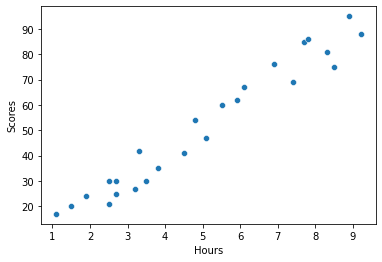

In [13]:
sns.scatterplot(x=data['Hours'], y=data['Scores']);   # plot the data

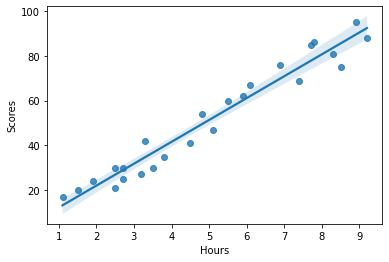

In [14]:
sns.regplot(x=data['Hours'], y=data['Scores']);  # regression plot gives a better and clear visualization for such data

**Separate feature and target**

In [15]:
X = data[['Hours']]
y = data['Scores']

**Train-Test Split**

In [20]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**Model Building**

In [21]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

In [22]:
regressor.fit(train_X, train_y)   ## train the model

LinearRegression()

In [23]:
pred_y = regressor.predict(val_X) ## prediction

In [24]:
pd.DataFrame({'Actual': val_y, 'Predicted': pred_y})  ## view actual and predicted on test set side-by-side


,Actual,Predicted
5,20,16.844722
2,27,33.745575
19,69,75.500624
16,30,26.786400
11,62,60.588106
22,35,39.710582
17,24,20.821393


**Actual vs Predicted distribution plot** 


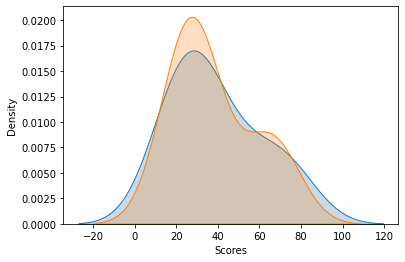

In [25]:
sns.kdeplot(pred_y,label="Predicted", shade=True);

sns.kdeplot(data=val_y, label="Actual", shade=True);

In [26]:
print('Train accuracy: ', regressor.score(train_X, train_y),'\nTest accuracy : ', regressor.score(val_X, val_y) )


Train accuracy:  0.9484509249326872 
Test accuracy :  0.9367661043365056


- Predicting percent for custom input value for hours

In [28]:
# Q. What will be predicted score if a student studies for 9.25 hrs/ day? 

h = [[9.25]]
s = regressor.predict(h)
print('A student who studies ', h[0][0] , ' hours is estimated to score ', s[0])

A student who studies  9.25  hours is estimated to score  93.89272889341652
